In [1]:

import numpy as np
import pandas as pd   
import os
from pathlib import Path
import glob
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers.experimental import preprocessing

print('fim')

2021-08-21 19:26:30.253564: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-08-21 19:26:30.253711: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


fim


In [2]:
print(tf.__version__)
from keras.backend import manual_variable_initialization
manual_variable_initialization(True)

2.4.1


ModuleNotFoundError: No module named 'keras'

In [3]:
def GravarArquivo ( data_dict,fname):
    fname = fname +"_" +str(len(data_dict)) + '.json'
    print("gravar arquivo: " + fname + " qtd: " +  str(len(data_dict)))
    os.makedirs('Percentage_'+ str(percentageData) , exist_ok=True)
    fname = 'Percentage_'+ str(percentageData) + "/" + fname
    # Create file
    with open(fname, 'w') as outfile:
        json.dump(data_dict, outfile, ensure_ascii=False, indent=4) 
        outfile.close()

In [4]:
def plot_loss(history):
            plt.plot(history.history['loss'], label='training loss')
            plt.plot(history.history['val_loss'], label=' validation loss')
            #plt.ylim([0, 10])
            plt.xlabel('Epopch')
            plt.ylabel('Error')
            plt.legend()
            plt.grid(True)
            plt.savefig( 'Percentage_'+ str(percentageData) + '/error_datalenght.png')
            plt.show()

def plot_acc(history):  
            plt.plot(history.history['sparse_categorical_accuracy'])
            plt.plot(history.history['val_sparse_categorical_accuracy'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'val'], loc='upper left')
            plt.grid(True)
            plt.savefig('Percentage_'+ str(percentageData) + '/accuracy_datalenght.png')
            plt.show()

In [5]:
#Check GPU is available for training or not Or whether the tensorflow version can utilize gpu 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Number of GPUs :", len(physical_devices)) 
print("Tensorflow GPU :",tf.test.is_built_with_cuda())
if len(physical_devices)>0:
    device="/GPU:0"
else:
    device="/CPU:0"
percentageData = 0.10
posTrainList=[]
posValList=[]
BATCH_SIZE=1
IMG_SIZE=(200,200)
QtdEpocasGravarCHKP = 10
Epochs = 60
lenghtDataTrain = 0
lenghtDataVal =0

Number of GPUs : 0
Tensorflow GPU : True


2021-08-20 03:34:57.242079: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-20 03:34:57.242731: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-08-20 03:34:57.242801: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-20 03:34:57.242860: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6ed01e512f6d): /proc/driver/nvidia/version does not exist


In [6]:
trainList=[]

with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_train_questions.json') as f:
    print('oi')
    data = json.load(f)
    lenghtDataTrain = int(len(data['questions']) * (percentageData/100))
    print(lenghtDataTrain)
    for K in range(lenghtDataTrain):
        i = data['questions'][K]
       
        temp=[]
        for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/train/'+i['image_filename']): 
            temp.append(path)
           
        temp.append(i['question'])
        temp.append(i['answer'])
        trainList.append(temp)
        posTrainList.append(K)
f.close()
labels=['Path','Question','Answer']
train_dataframe = pd.DataFrame.from_records(trainList, columns=labels)#training Dataframe 
del(data)
del(trainList)
print('fim')


oi
699
fim


In [7]:
valList=[]
with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_val_questions.json') as f:
    data = json.load(f)
    lenghtDataVal = int(len(data['questions']) * (percentageData/100))
    for K in range(lenghtDataVal):
    
       
        i = data['questions'][K]
        
        temp=[]
        for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/val/'+i['image_filename']): 
            temp.append(path)
        temp.append(i['question'])
        temp.append(i['answer'])
        valList.append(temp)
        posValList.append(K)
f.close() 

val_dataframe = pd.DataFrame.from_records(valList, columns=labels)#validation Dataframe
del(data)
del(valList)
val_dataframe.head()
print('passou carregou')

passou carregou


In [8]:
vocab_set=set()#set object used to store the vocabulary

tokenizer = tfds.features.text.Tokenizer()
valtest=[]

valList =[]
with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_train_questions.json') as f:
    print('oi')
    data = json.load(f)
   
    print(int(len(data['questions'])))
    for K in range(int(len(data['questions']))):
        i = data['questions'][K]
        temp=[]
        for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/train/'+i['image_filename']): 
            temp.append(path)
        temp.append(i['question'])
        temp.append(i['answer'])
        valtest.append(temp)
   
f.close()
labels=['Path','Question','Answer']
train_dataframe2 = pd.DataFrame.from_records(valtest, columns=labels)#training Dataframe 
del(data)
del(valtest)
print('fim')

valList=[]
with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_val_questions.json') as f:
    data = json.load(f)
    lenghtDataVal = int(len(data['questions']) * (percentageData/100))
    for K in range(int(len(data['questions']))):
        i = data['questions'][K]
        temp=[]
        for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/val/'+i['image_filename']): 
            temp.append(path)
        temp.append(i['question'])
        temp.append(i['answer'])
        valList.append(temp)
        
f.close() 

val_dataframe2 = pd.DataFrame.from_records(valList, columns=labels)#validation Dataframe




for i in val_dataframe2['Question']:
    vocab_set.update(tokenizer.tokenize(i))
for i in train_dataframe2['Question']:
    vocab_set.update(tokenizer.tokenize(i))
for i in val_dataframe2['Answer']:
    vocab_set.update(tokenizer.tokenize(i))
for i in train_dataframe2['Answer']:
    vocab_set.update(tokenizer.tokenize(i))
    
vocab_set.update('12aaaa')
vocab_set.update('1234sssa')

#
#Creating an Encoder and a Function to preprocess the text data during the training and inference    
    
encoder=tfds.features.text.TokenTextEncoder(vocab_set)
index=2
print("Testing the Encoder with sample questions - \n ")
example_text=encoder.encode(train_dataframe['Question'][index])
print("Original Text = "+train_dataframe['Question'][index])
print("After Encoding = "+str(example_text))


oi
699989
fim
Testing the Encoder with sample questions - 
 
Original Text = Is the color of the large sphere the same as the large matte cube?
After Encoding = [73, 41, 38, 58, 41, 43, 51, 41, 49, 33, 41, 43, 82, 29]


In [9]:
print(len(vocab_set))

101


In [10]:
GravarArquivo(posValList,'Val_pos' )
GravarArquivo(posTrainList,'Train_pos' )
GravarArquivo(list(vocab_set), 'Vocab_set' )



gravar arquivo: Val_pos_149.json qtd: 149
gravar arquivo: Train_pos_699.json qtd: 699
gravar arquivo: Vocab_set_101.json qtd: 101


In [11]:

#Function that uses the encoder created to encode the input question and answer string
def encode_fn(text):
    return np.array(encoder.encode(text.numpy()))


#Function to load and decode the image from the file paths in the dataframe and use the encoder function
def preprocess(ip,ans):
    img,ques=ip#ip is a list containing image paths and questions
    img=tf.io.read_file(img)
    img=tf.image.decode_jpeg(img,channels=3)
    # quantos canais de cores tem 
    img=tf.image.resize(img,IMG_SIZE)
    img=tf.math.divide(img, 255)# 
    #The question string is converted to encoded list with fixed size of 50 with padding with 0 value
    ques=tf.py_function(encode_fn,inp=[ques],Tout=tf.int32)
    paddings = [[0, 50-tf.shape(ques)[0]]]
    ques = tf.pad(ques, paddings, 'CONSTANT', constant_values=0)
    ques.set_shape([50])#Explicit shape must be defined in order to create the Input pipeline
    
    #The Answer is also encoded 
    ans=tf.py_function(encode_fn,inp=[ans],Tout=tf.int32)
    ans.set_shape([1])
    print(ans)
    return (img,ques),ans
    
def create_pipeline(dataframe):
    raw_df=tf.data.Dataset.from_tensor_slices(((dataframe['Path'],dataframe['Question']),dataframe['Answer']))
    df=raw_df.map(preprocess)#Preprocessing function is applied to the dataset
    df=df.batch(BATCH_SIZE)#The dataset is batched
    return df

#The training and validation Dataset objects are created
train_dataset=create_pipeline(train_dataframe)
validation_dataset=create_pipeline(val_dataframe)

2021-08-20 03:39:14.630670: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-20 03:39:14.657461: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Tensor("EagerPyFunc_1:0", shape=(1,), dtype=int32, device=/job:localhost/replica:0/task:0)
Tensor("EagerPyFunc_1:0", shape=(1,), dtype=int32, device=/job:localhost/replica:0/task:0)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 256)      26112       text_input[0][0]                 
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 512)      1050624     embedding[0][0]                  
______________________________________________________________________________________________

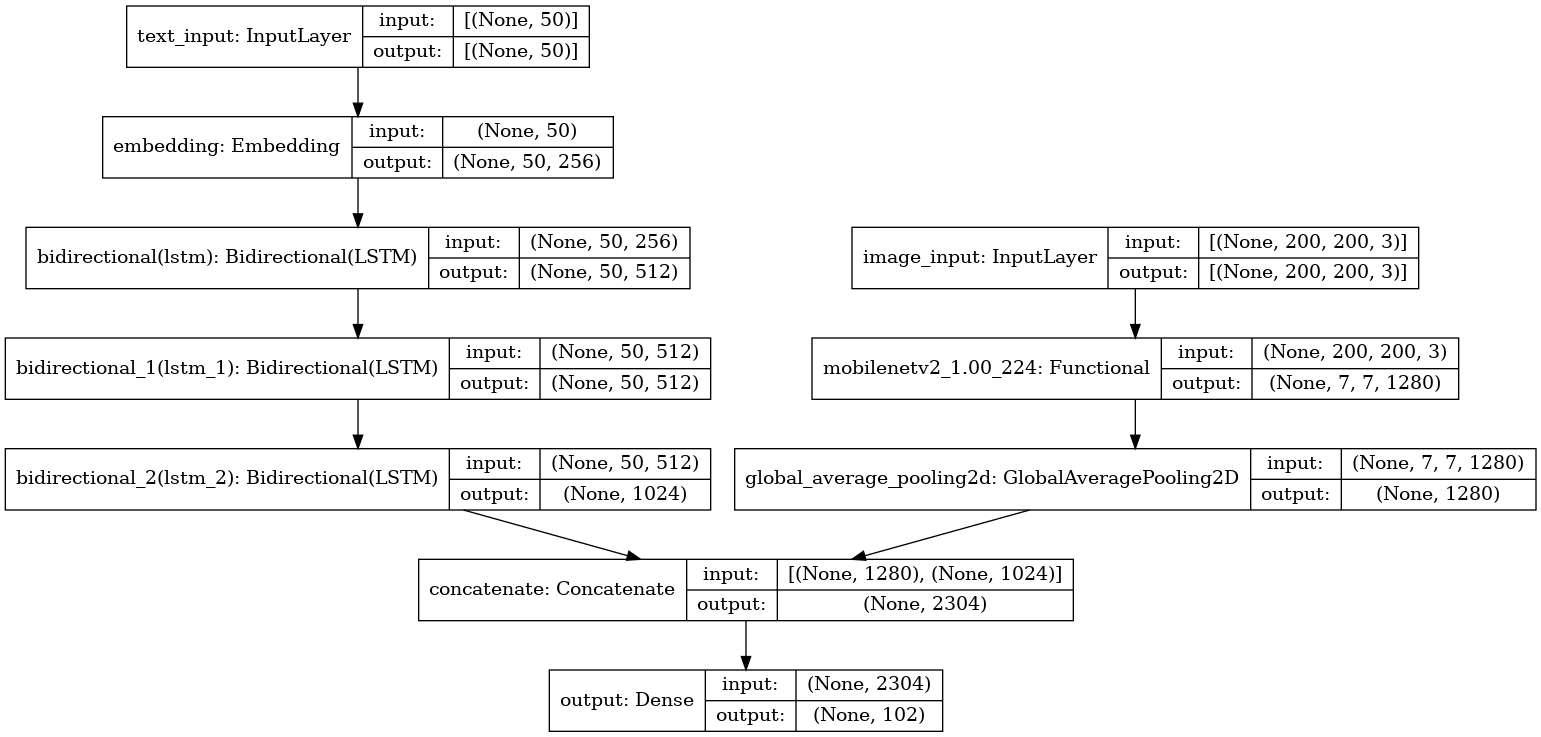

In [12]:
#Creating the CNN model for image processing


CNN_Input=tf.keras.layers.Input(shape=(200,200,3),name='image_input')

mobilenetv2=tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(200,200,3), alpha=1.0, include_top=False,
                                                      weights='imagenet', input_tensor=CNN_Input)

CNN_model=tf.keras.models.Sequential()
CNN_model.add(CNN_Input)
CNN_model.add(mobilenetv2)
CNN_model.add(tf.keras.layers.GlobalAveragePooling2D())



#Creating the RNN model for text processing
RNN_model=tf.keras.models.Sequential()

RNN_Input=tf.keras.layers.Input(shape=(50),name='text_input')
RNN_model.add(RNN_Input)
RNN_model.add(tf.keras.layers.Embedding (len(vocab_set)+1,256))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True,recurrent_initializer='glorot_uniform')))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True,recurrent_initializer='glorot_uniform')))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512,return_sequences=False,recurrent_initializer='glorot_uniform')))


concat=tf.keras.layers.concatenate([CNN_model.output,RNN_model.output])
dense_out=tf.keras.layers.Dense(len(vocab_set)+1,activation='softmax',name='output')(concat)

model = tf.keras.Model(inputs=[CNN_Input,RNN_Input],
                    outputs=dense_out)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [13]:
print(QtdEpocasGravarCHKP*lenghtDataTrain)
print(QtdEpocasGravarCHKP)
print(lenghtDataTrain)

6990
10
699


In [ ]:


def scheduler(epoch):
  if epoch < 1:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (1 - epoch))

checkpoint_path = 'Percentage_'+ str(percentageData) + '/weights-{epoch:03d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=QtdEpocasGravarCHKP*lenghtDataTrain)

print(QtdEpocasGravarCHKP*lenghtDataTrain)

#LRS = tf.keras.callbacks.LearningRateScheduler(scheduler)
csv_callback=tf.keras.callbacks.CSVLogger(
   'Percentage_'+ str(percentageData) + '/'+ "Training Parameters.csv",
    separator=',', append=False
)


with tf.device(device) :
    history =  model.fit(train_dataset,
              validation_data=validation_dataset,
              callbacks=[csv_callback,cp_callback],
              epochs=Epochs)


hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
history.history
hist.tail()
#plot_loss(history)
#plot_acc(history)


6990


2021-08-20 03:39:23.906296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-20 03:39:23.911464: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200155000 Hz


Epoch 1/60
308/699 [============>.................] - ETA: 4:51 - loss: 3.5366 - sparse_categorical_accuracy: 0.1657

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
history.history
hist.tail()
plot_loss(history)
plot_acc(history)

In [ ]:
print (' *************** vocab se *************************')
for voc in vocab_set:
 print(voc)


In [ ]:
contadorCerto =0
contadorErro =0 
ArrayQuestoesCertas =[]
ArrarQuestoesErradas=[]

for contador in range(lenghtDataTrain) :
   
    im=cv2.imread(train_dataframe.iloc[contador]['Path'])
    im=cv2.resize(im,(200,200))
    q=train_dataframe.iloc[contador]['Question'] 
    q=encoder.encode(q)
    paddings = [[0, 50-tf.shape(q)[0]]]
    q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
    q=np.array(q)
    im.resize(1,200,200,3)
    q.resize(1,50)
    ans=model.predict([im,q]) 
    decodAns = encoder.decode([np.argmax(ans)])
        
    
    if train_dataframe.iloc[contador]['Answer'] != decodAns :
        ArrarQuestoesErradas.append ("qestão numero : " + str(contador))
        ArrarQuestoesErradas.append(train_dataframe.iloc[contador]['Question'])
        ArrarQuestoesErradas.append('Repost errada: ' +decodAns + " resp certa:" + train_dataframe.iloc[contador]['Answer']) 
        contadorErro = contadorErro +1
    else:
        ArrayQuestoesCertas.append("qestão numero : " + str(contador))
        ArrayQuestoesCertas.append(train_dataframe.iloc[contador]['Question'])
        ArrayQuestoesCertas.append(  decodAns)
        ArrayQuestoesCertas.append(train_dataframe.iloc[contador]['Answer'])
        contadorCerto = contadorCerto +1

    

In [ ]:
print( "questoes certas" + str(contadorCerto))
print( "questoes erradas" + str(contadorErro))
VerifTrainList=[]
VerifTrainList.append("Acerto - " + str(contadorCerto))
VerifTrainList.append("Erro - " + str(contadorErro ))
GravarArquivo(VerifTrainList,'Verif_Train_resumo' )
GravarArquivo(ArrayQuestoesCertas,'Verif_train_questoescertas' )
GravarArquivo(ArrarQuestoesErradas,'Verif_train_questoeserradas' )


In [ ]:
contadorCerto =0
contadorErro =0 
ArrayQuestoesCertas =[]
ArrarQuestoesErradas=[]

for contador in range(lenghtDataVal) :
   
    im=cv2.imread(val_dataframe.iloc[contador]['Path'])
    im=cv2.resize(im,(200,200))
    q=val_dataframe.iloc[contador]['Question'] 
    q=encoder.encode(q)
    paddings = [[0, 50-tf.shape(q)[0]]]
    q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
    q=np.array(q)
    im.resize(1,200,200,3)
    q.resize(1,50)
    ans=model.predict([im,q]) 
    decodAns = encoder.decode([np.argmax(ans)])
    if val_dataframe.iloc[contador]['Answer'] != decodAns :
        ArrarQuestoesErradas.append ("qestão numero : " + str(contador))
        ArrarQuestoesErradas.append(val_dataframe.iloc[contador]['Question'])
        ArrarQuestoesErradas.append( " errado - " + decodAns + " certo - " + val_dataframe.iloc[contador]['Answer'] )
              
        contadorErro = contadorErro +1
    else:
        ArrayQuestoesCertas.append ("qestão numero : " + str(contador))
        ArrayQuestoesCertas.append(val_dataframe.iloc[contador]['Question'])
        ArrayQuestoesCertas.append(decodAns)
        ArrayQuestoesCertas.append(val_dataframe.iloc[contador]['Answer'])
       
        contadorCerto = contadorCerto +1
      

    

In [ ]:
VerifValList=[]
print("certo : " + str(contadorCerto))
print("erro : " + str(contadorErro))
VerifValList.append("Acerto - " + str(contadorCerto))
VerifValList.append("Erro - " + str(contadorErro ))
GravarArquivo(VerifValList,'Verif_Val_resumo' )
GravarArquivo(ArrayQuestoesCertas,'Verif_val_questoescertas' )
GravarArquivo(ArrarQuestoesErradas,'Verif_val_questoeserradas' )

In [ ]:
tf.keras.models.save_model(model,'Percentage_'+ str(percentageData) +  '/ModelTreinamento')

In [ ]:
import pickle

with open('Percentage_'+ str(percentageData) +  '/train_dataframe', "wb") as f:
    pickle.dump(train_dataframe, f)
with open('Percentage_'+ str(percentageData) +  '/encoder', "wb") as f:
    pickle.dump(encoder, f)

with open('Percentage_'+ str(percentageData) +  '/val_dataframe', "wb") as f:
    pickle.dump(val_dataframe, f)
